# Title of the notebook

This title can be used to appear in the Jupyter Book content table

<div class="alert alert-warning">

The markdown structure of the notebook directly relates to the structure of the website, as Jupyter Book parses markdown structure. For that reason : 
    
- use level 1 identation (#) only for the title, otherwise it will appear on the website
- use level 2 identation (##) for the different parts of the notebook - they will appear in the "Content" right panel on the website once you are on the tutorial page
- use appropriate level identation, meaning "in order" : do not use level 4 (####) right after a level 2 (##), bur a level three first (###).
    
</div>    
    
## Objectives : 
- Write some objectives here
- And some other here
- Even a third one


## The set-up

Write the step-up to launch the tutorial here! It should be as easy as possible.







### Questions to discuss : 

#### Question #1

How to include the different subparts within the template? 

<div class="alert alert-info">

**Information:** This is a note!

</div>

<div class="alert alert-warning">

**Question:** This is a note!

</div>

<div class="alert alert-warning">

How to have:
   
    - Warnings
    - Informations
    - Remarks

</div>


Should we have everyone settings its own standard?


<span style='color: #a13203; font-weight: 600;'>💬 Question 1 💬</span> Run the following command lines

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span>

<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span>

The best thing is probably to have such a structure : 

```
<div class="alert-question">
 Question : How to ...
</div>

```

and to modify it directly in `_static/css/custom_css.css` and `_static/js/custom_js.js` files

#### Question #2 : 
Do we number the questions? 

## Part I: The data

We import a functional medical imaging dataset. We have extracted, for each timepoint, the average value of the metabolic activity of the _putamen_. This brain region is commonly damaged by _Parkinson's disease_.

IMPORTANT: The values have been normalized such that a _normal value_ is zero and a _very abrnomal value_ is one. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 2 💬</span> Run the following cell and look at the `head` of the dataframe to better understand what the data are.

In [3]:
from leaspy.datasets import Loader
df = Loader.load_dataset('parkinson-putamen-train_and_test')

# To complete

In [4]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df.head()

PUTAMEN
ID     TIME      SPLIT          
GS-001 71.354607 train  0.728492
       71.554604 train  0.735620
       72.054604 train  0.757409
       73.054604 train  0.800754
       73.554604 train  0.870756

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> The `SPLIT` column already distinguishes the train and test data.

<span style='color: #a13203; font-weight: 600;'>💬 Question 3 💬</span> Describe the target variable `PUTAMEN` and the explicative variable `TIME`. You can plot:

- Sample size
- Mean, std
- Min & max values
- Quantiles

In [5]:
# To complete

In [5]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df.reset_index().describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
TIME,1997.0,65.37,10.05,33.14,58.66,66.48,72.06,91.24
PUTAMEN,1997.0,0.71,0.10,0.35,0.64,0.71,0.77,0.96


<span style='color: #a13203; font-weight: 600;'>💬 Question 4 💬</span> From this value, what can you say about the disease stage of the population?

Your answer: ...

 Answer:
The median and mean value is 0.71, so the average disease stage is high for these subjects.

<span style='color: #a13203; font-weight: 600;'>💬 Question 5 💬</span> Display the data, where the Putamen (y-axis) is plot with respect to the Time (x-axis)

In [7]:
# To complete

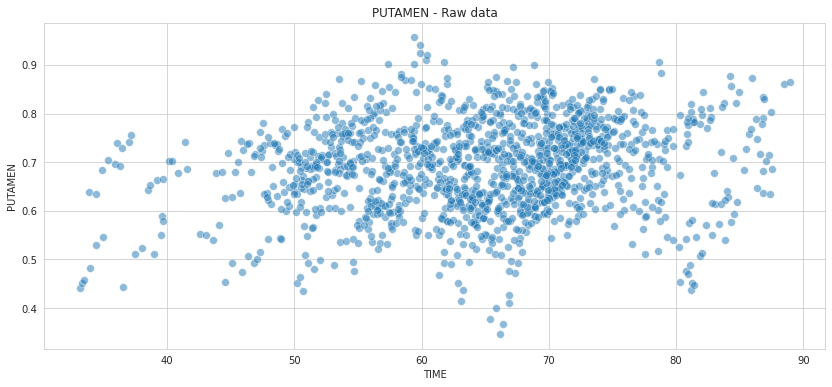

In [6]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
sns.scatterplot(data=df.xs('train', level='SPLIT').reset_index(), 
                x='TIME', y='PUTAMEN', alpha=.5, s=60)
plt.title('PUTAMEN - Raw data')
plt.show()

<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> At first look, the _PUTAMEN values_ do not seem highly correlated to _TIME_.


## Part II: Linear Regression

As we are some pro ML players, let's make some predictions : let's try to predict the putamen value based on the time alone.

<span style='color: #a13203; font-weight: 600;'>💬 Question 6 💬</span> Store the train and test data in `df_train` and `df_test`

In [9]:
# To complete

In [7]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

pds = pd.IndexSlice
df_train = df.loc[pds[:, :, 'train']].copy()  # one possibility
df_test = df.xs('test', level='SPLIT').copy()  # an other one

<span style='color: #a13203; font-weight: 600;'>💬 Question 7 💬</span> Run the linear reagression that is in scipy. 

Be carefull, you have to train it only with the train set!

In [1]:
x = # Complete with the appropriate data
y = # Complete with the appropriate data

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [22]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

x = df_train.index.get_level_values('TIME').values
y = df_train['PUTAMEN'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> To run the notebook smoothly, you must comply to the following rules: we are going to try different models to predict the putamen values based on each observation.

We will store the results in the dataframe `df` such that : 

| ID | TIME | SPLIT | PUTAMEN | Model 1 | Model 2 | ... |
| --- | --- | --- | --- | --- | --- | --- |
| GS-001 | 74.4 | train | 0.78 | 0.93 | 0.75 | ... |
| GS-003 | 75.4 | train | 0.44 | 0.84 | 0.46 | ... |
| GS-018 | 51.8 | test | 0.71 | 0.73 | 0.78 | ... |
| GS-056 | 89.2 | train | 0.76 | 0.56 | 0.61 | ... |

This will ease the comparison of the models. 

<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> No need to add these predictions to `df_train` and `df_test`. You should be able to easily run the notebook by keeping `df_train` the way it is while appending the results in `df`.

<span style='color: #a13203; font-weight: 600;'>💬 Question 8 💬</span> Add the predictions done by the linear regression in the column `Linear Regression`

In [ ]:
df['Linear Regression'] = # Your code here

In [23]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df['Linear Regression'] = intercept + slope * df.index.get_level_values('TIME')

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Let's introduce an object and a fonction that will be used to compare the models: 
- `overall_results` will be the dataframe that stores the root mean square error on the train and test set for the different models

- `compute_rmse_train_test` is the function that given the dataframe `df` and a `model_name` (`Linear Regression` for instance), compute the mean absolute error on the train and test set and stores it in `overall_results`

<span style='color: #a13203; font-weight: 600;'>💬 Question 9 💬</span> Run the following cell to see the results

In [24]:
overall_results = pd.DataFrame({'train': [], 'test': []})  


def compute_rmse(df, model_name):
    """Compute RMSE between PUTAMEN column and the <model_name> column of df"""
    y = df['PUTAMEN']
    y_hat = df[model_name]
    diff = y - y_hat
    return np.sqrt(np.mean(diff * diff))


def compute_rmse_train_test(df, overall_results, model_name):
    """Inplace modification of <overall_results>"""
    overall_results.loc[model_name, 'train'] = compute_rmse(df.xs('train', level='SPLIT'), model_name)
    overall_results.loc[model_name, 'test'] = compute_rmse(df.xs('test', level='SPLIT'), model_name)

compute_rmse_train_test(df, overall_results, 'Linear Regression')
overall_results

,train,test
Linear Regression,0.091403,0.10213


<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> The RMSE is higher on the test set as on the train set


Let's look at what we are doing by plotting the data and the linear regression. Throughout the notebook, we will use the function `plot_individuals` that, given a subset of IDs and a model name (as stored in the `df` dataframe) plots the individual data and their prediction

<span style='color: #a13203; font-weight: 600;'>💬 Question 10 💬</span> Use the following cell. 

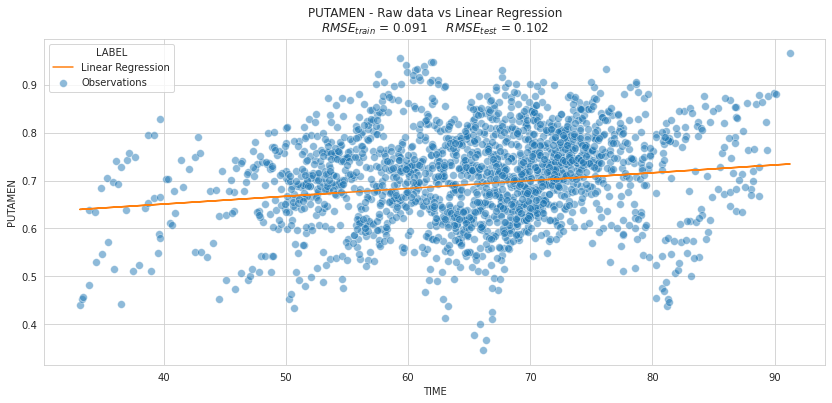

In [25]:
def get_title(overall_results, model_name):
    """Precise model's name and its RMSE train & test"""
    rmse_train = overall_results.loc[model_name, 'train']
    rmse_test = overall_results.loc[model_name, 'test']
    title = f'PUTAMEN - Raw data vs {model_name:s}\n'
    title += r'$RMSE_{train}$ = %.3f     $RMSE_{test}$ = %.3f' % (rmse_train, rmse_test)
    return title

    
def plot_individuals(df, overall_results, model_name, **kwargs):
    # ---- Input manager
    kind = kwargs.get('kind', 'lines')
    sublist = kwargs.get('sublist', None)
    highlight_test = kwargs.get('highlight_test', True)
    ax = kwargs.get('ax', None)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 6))
    else:
        plt.figure(figsize=(14, 6))
    
    # ---- Select subjects
    if sublist is None:
        sublist = df.index.unique('ID')
        
    # ---- If too many subject, do not display them in the legend
    display_id_legend = len(sublist) <= 10
    
    # ---- Plot
    if kind == 'scatter':
        # -- Used for Linear Regression
        sns.scatterplot(data=df.reset_index(), x='TIME', y='PUTAMEN', alpha=.5, 
                        s=60, label='Observations', ax=ax)
        ax.plot(df.index.get_level_values('TIME').values,
                df[model_name].values, 
                label=model_name, c='C1')
        ax.legend(title='LABEL')
        if highlight_test:
            test = df.xs('test', level='SPLIT').loc[sublist].reset_index()
            sns.scatterplot(data=test, x='TIME', y='PUTAMEN', legend=None, ax=ax)
        
    elif kind == 'lines':
        # -- Used for the other models
        # - Stack observations & reconstructions by the model
        df_stacked = df[['PUTAMEN', model_name]].copy()
        df_stacked.rename(columns={'PUTAMEN': 'Observations'}, inplace=True)
        df_stacked = df_stacked.stack().reset_index().set_index(['ID', 'SPLIT'])
        df_stacked.columns = ['TIME', 'LABEL', 'PUTAMEN']
        
        # - Plot
        sns.lineplot(data=df_stacked.loc[sublist], 
                     x='TIME', y='PUTAMEN', hue='ID', style='LABEL', 
                     legend=display_id_legend, ax=ax)
        if highlight_test:
            test = df.xs('test', level='SPLIT').loc[sublist].reset_index()
            sns.scatterplot(data=test, x='TIME', y='PUTAMEN', hue='ID', legend=None, ax=ax)
        if display_id_legend:
            ax.legend(title='LABEL', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        raise ValueError('<kind> input accept only "scatter" and "lines".'
                         f' You gave {kind}')
        
    ax.set_title(get_title(overall_results, model_name))
    return ax
    
plot_individuals(df, overall_results, 'Linear Regression', 
                 kind='scatter', highlight_test=False)
plt.show()

Is the previous plot relevant to assess the quality of our model?

We will answer this question in the following cells:

## Part III: The longitudinal aspect


<span style='color: #a13203; font-weight: 600;'>💬 Question 11 💬</span> Run the cell to have a better understanding of your data:

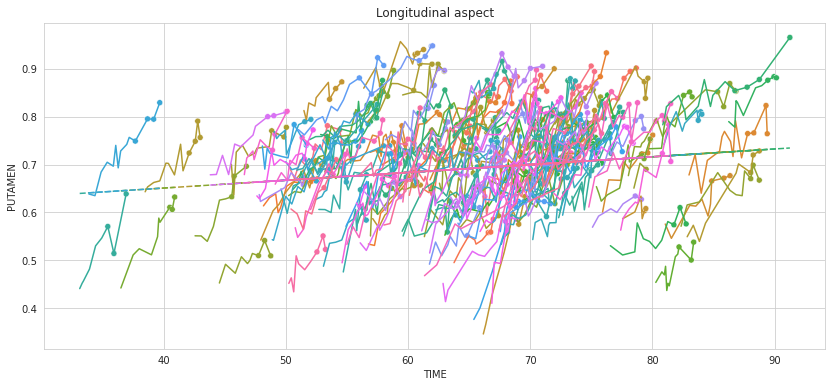

In [26]:
plot_individuals(df, overall_results, 'Linear Regression', 
                 kind='lines', highlight_test=True)
plt.title('Longitudinal aspect')
plt.show()

The test data are highlited with dots.
<span style='color: #a13203; font-weight: 600;'>💬 Question 12 💬</span> What are actually the test data ?

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 13 💬</span>Why does the global linear model not describe the temporal evolution of the variable?

Your answer: ...

## PART IV: Indivual Linear Regressions


<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> In fact, this is not the best idea to have one general linear regression. Because we do not benefit from indiviudal information. Therefore, let's do one linear regression per individual

<span style='color: #a13203; font-weight: 600;'>💬 Question 14 💬</span> Look at what this function is doing and at the result

In [27]:
individual_parameters = pd.DataFrame({'INTERCEPT': [], 'SLOPE': []})

subject_idx = 'GS-194'

def compute_individual_parameters(df, subject_idx):
    df_patient = df.loc[subject_idx]
    
    x = df_patient.index.get_level_values('TIME').values
    y = df_patient['PUTAMEN'].values
    
    # -- Linear regression
    slope, intercept, _, _, _ = stats.linregress(x, y)
    
    
    return intercept, slope


individual_parameters.loc[subject_idx] = compute_individual_parameters(df_train, subject_idx)

individual_parameters

,INTERCEPT,SLOPE
GS-194,0.025188,-0.807941


<span style='color: #a13203; font-weight: 600;'>💬 Question 15 💬</span> Apply the function to everyone 

In [101]:
# Your answer

In [28]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #


for subject_idx in df_train.index.unique('ID'):
   
    slope, intercept = compute_individual_parameters(df_train, subject_idx)
    individual_parameters.loc[subject_idx] = (intercept, slope)
    
individual_parameters.head()

,INTERCEPT,SLOPE
GS-194,-0.807941,0.025188
GS-001,-2.946305,0.051464
GS-002,-0.252949,0.018643
GS-003,0.517972,0.003816
GS-004,-1.076280,0.025680


<span style='color: #a13203; font-weight: 600;'>💬 Question 16 💬</span> __Now append the result of the model in `df` using the function below.__

<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> Take a close look at what we are doing cause we will use the same syntax if other questions.

In [29]:
def compute_individual_reconstruction(x, parameters):
    
    subject_idx = x.name[0]
    
    slope = parameters.loc[subject_idx]['SLOPE']
    intercept = parameters.loc[subject_idx]['INTERCEPT']
    
    time = x.name[1]
    
    return intercept + slope * time
    
    

df['Individual Linear Regression'] = df.apply(
    lambda x: compute_individual_reconstruction(x, individual_parameters), axis=1)

<span style='color: #a13203; font-weight: 600;'>💬 Question 17 💬</span> Use the `compute_train_test_mean_absolute_error` function to get the train and test errors and compare the two models.

In [104]:
# Your code here

In [30]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

compute_rmse_train_test(df, overall_results, 'Individual Linear Regression')
overall_results

,train,test
Linear Regression,0.091403,0.102130
Individual Linear Regression,0.017825,0.032197


We clearly see that the RMSE is much better!
<span style='color: #a13203; font-weight: 600;'>💬 Question 18 💬</span> Create a list with the five patients having the more visits and the five patients having the less visits, then use `plot_individuals` function to display their observations and reconstructions by the model
_Hint_ : use the keyword `sublist`

In [106]:
# sublist = # TODO
# plot_individuals(df, overall_results, model_name, sublist=sublist)

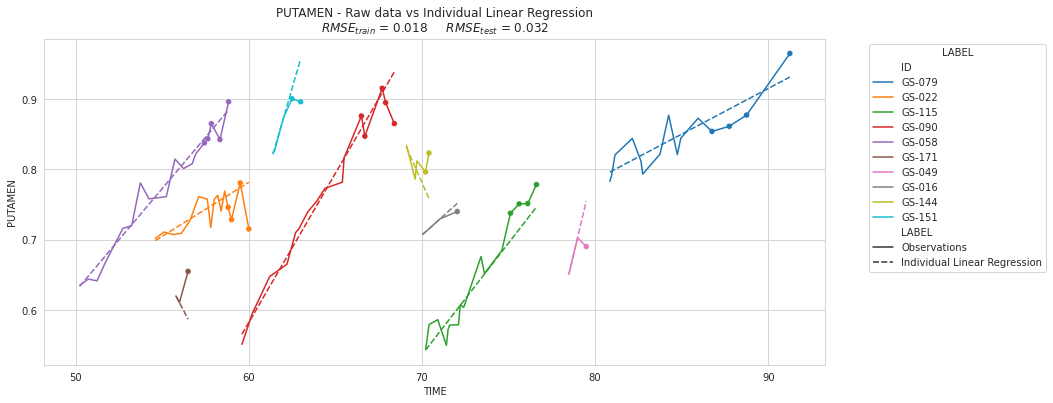

In [31]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

visits_per_subjects = df.groupby(df.index.get_level_values('ID')).count().sort_values('PUTAMEN')
sublist = visits_per_subjects.tail(5).index.tolist()
sublist += visits_per_subjects.head(5).index.tolist()

plot_individuals(df, overall_results, 'Individual Linear Regression', sublist=sublist)
plt.show()

<span style='color: #a13203; font-weight: 600;'>💬 Question 19 💬</span> Explain why $RMSE_{test} >> RMSE_{train}$:

Your answer: ...

**Answer**: the LM overfit for patients with only few data

## Part V : Linear Mixed effects Model with `statsmodels`
With the previous method, we made a significant improvement. However, we suffer fro an overfitting problem. Let's see what a _mixed effect model_ can do for us!

### Run a LMM with `statsmodels`

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> We will use the `statsmodel` package to run a Linear Mixed Effect Model (LMM or LMEM in the literature).


<span style='color: #a13203; font-weight: 600;'>💬 Question 20 💬</span> Load the following lines to import the packages

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLMParams

`Statsmodels` contains several _API_ to create a model. For the ones familiar with _R_, you will be here in a familiar ground with the _formula API_.
- `formula='PUTAMEN ~ TIME + 1'` means that you want to explain _PUTAMEN_ with _TIME_ and an _intercept_
- `groups="ID"` means that you want random effect for all levels of _ID_
- `re_formula="~TIME + 1"` means that you want a random intercept and a random slope for _TIME_

If you go back to the equation you get :
$ PUTAMEN_{id,time} = \underbrace{\alpha*TIME_{id,time} + \beta}_\text{formula} + \underbrace{\alpha_{id}*TIME_{id,time} + \beta_{id}}_\text{re_formula}$

<span style='color: #a13203; font-weight: 600;'>💬 Question 21 💬</span> Let's try a very **_naive_** run:

In [33]:
lmm = smf.mixedlm(formula='PUTAMEN ~ 1 + TIME', 
                  data=df_train.reset_index(), 
                  groups="ID", re_formula="~ 1 + TIME").fit()
lmm.summary()

/home/juliette.ortholand/miniconda3/envs/leaspype/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliette.ortholand/miniconda3/envs/leaspype/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/juliette.ortholand/miniconda3/envs/leaspype/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:              MixedLM Dependent Variable: PUTAMEN  
No. Observations:   1415    Method:             REML     
No. Groups:         200     Scale:              0.0007   
Min. group size:    2       Log-Likelihood:     2497.0458
Max. group size:    13      Converged:          Yes      
Mean group size:    7.1                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.685    0.044 -15.644 0.000 -0.771 -0.599
TIME           0.022    0.001  29.528 0.000  0.020  0.023
ID Var         0.003    0.259                            
ID x TIME Cov  0.000    0.005                            
TIME Var       0.000    0.000                            
=========================================================

"""

<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> Let's skip the different warning for now and see what happens if we ignore it

Let's try and see.

<span style='color: #a13203; font-weight: 600;'>💬 Question 22 💬</span> Run the following commands to get the intercept and slope

In [34]:
print(lmm.fe_params.loc['Intercept'])
print(lmm.fe_params.loc['TIME'])

-0.6848661069361888
0.021679337332944623


<span style='color: #a13203; font-weight: 600;'>💬 Question 23 💬</span> Run the following commands to get the variation to the mean slope and intercept
Example on few subject

In [35]:
{key: val for key, val in lmm.random_effects.items() if key in 
 ['GS-00'+str(i) for i in range(1, 4)]}

{'GS-001': ID     -0.019149
 TIME   -0.001092
 dtype: float64,
 'GS-002': ID      0.058495
 TIME    0.004182
 dtype: float64,
 'GS-003': ID     -0.011974
 TIME   -0.001002
 dtype: float64}

<span style='color: #a13203; font-weight: 600;'>💬 Question 24 💬</span> From the fixed and random effects, compute for each subject its INTERCEPT and SLOPE:

In [34]:
# df_random_effects['INTERCEPT'] = # TODO
# df_random_effects['SLOPE'] = # TODO

# df_random_effects.head()

In [36]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df_random_effects = pd.DataFrame.from_dict(lmm.random_effects, orient='index')
df_random_effects = df_random_effects.rename({'ID': 'Random intercept', 'TIME': 'Random slope'}, axis=1)

df_random_effects['INTERCEPT'] = df_random_effects['Random intercept'] + lmm.fe_params.loc['Intercept']
df_random_effects['SLOPE'] = df_random_effects['Random slope'] + lmm.fe_params.loc['TIME']

df_random_effects.head()

,Random intercept,Random slope,INTERCEPT,SLOPE
GS-001,-0.019149,-0.001092,-0.704015,0.020588
GS-002,0.058495,0.004182,-0.626371,0.025861
GS-003,-0.011974,-0.001002,-0.696840,0.020677
GS-004,-0.020968,-0.001529,-0.705834,0.020150
GS-005,0.006285,0.000363,-0.678581,0.022043


<span style='color: #a13203; font-weight: 600;'>💬 Question 25 💬</span> Use the `compute_individual_reconstruction` function but with `df_random_effects` to compute the prediction with the new individual effects

In [ ]:
df['Linear Mixed Effect Model'] = # Your code here

In [37]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df['Linear Mixed Effect Model'] = df.apply(
    lambda x: compute_individual_reconstruction(x, df_random_effects), axis=1)

<span style='color: #a13203; font-weight: 600;'>💬 Question 26 💬</span> __Store the results in `overall_results` (thanks to `compute_rmse_train_test` function) and compare the models__

In [114]:
# Your code here

In [38]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

compute_rmse_train_test(df, overall_results, 'Linear Mixed Effect Model')

overall_results

,train,test
Linear Regression,0.091403,0.102130
Individual Linear Regression,0.017825,0.032197
Linear Mixed Effect Model,0.024533,0.039367


<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> The result is worse than with the previous model. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 27 💬</span> What do you think happened? Let's check it visually

In [ ]:
# Your code here

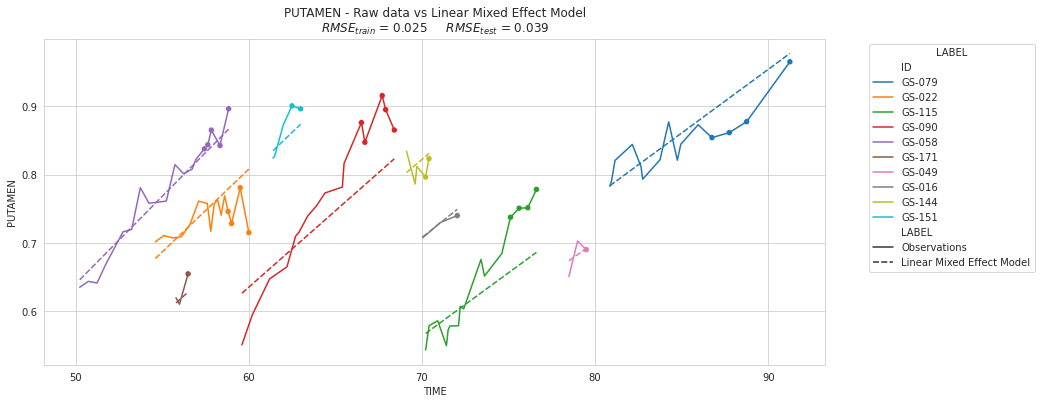

In [39]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

plot_individuals(df, overall_results, 'Linear Mixed Effect Model', sublist=sublist)
plt.show()

<span style='color: #d49800; font-weight: 600;'>⚡ Remark ⚡</span> All the slopes are the same. This is related to the warning above : these are warnings are a way of alerting you that you may be in a non-standard situation. Most likely, one of your variance parameters is converging to zero. Which is the case if you have a look to time variance. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 28 💬</span> Let's rerun it by normalizing the time first. Add to `df_train` and `df_test` a renormalizing function. Be careful to normalize only with the known ages from train.
_Hint_ : Watchout to data leakage!